In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [9]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

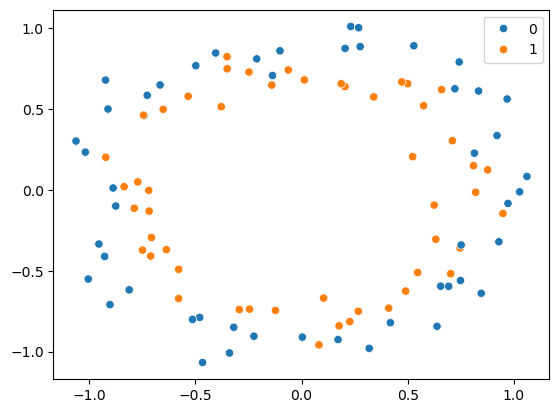

In [10]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [12]:
# model = Sequential()

# model.add(Dense(256, input_dim=2, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [13]:
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

In [15]:
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()

In [16]:
# plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
# plt.show()

# Early Stopping

In [17]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/home/ad/anaconda3/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [20]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=[callback])

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.5000 - loss: 0.6943 - val_accuracy: 0.4500 - val_loss: 0.6982
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.4500 - loss: 0.6924 - val_accuracy: 0.4000 - val_loss: 0.6995
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4625 - loss: 0.6906 - val_accuracy: 0.3500 - val_loss: 0.7016
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5375 - loss: 0.6898 - val_accuracy: 0.3000 - val_loss: 0.7040
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5875 - loss: 0.6883 - val_accuracy: 0.3000 - val_loss: 0.7047
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5500 - loss: 0.6877 - val_accuracy: 0.4000 - val_loss: 0.7054
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5375 - loss: 0.6868 - val_accuracy: 0.4500 - val_loss: 0.7069
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5375 - loss: 0.6855 - val_accuracy: 0.4500 - 

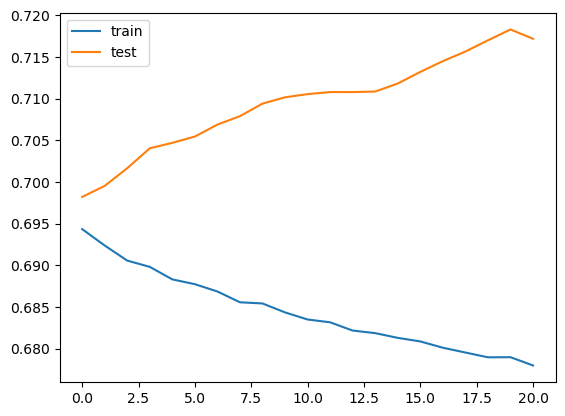

In [21]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


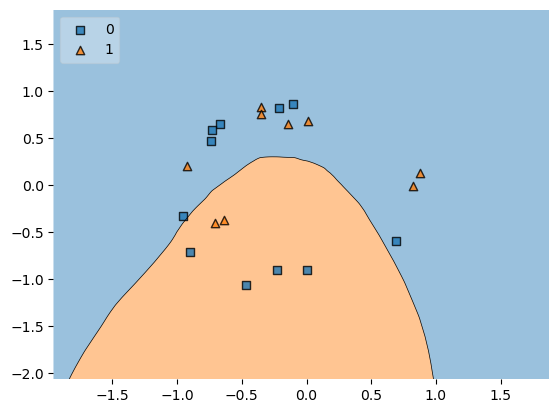

In [22]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()